# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Binomial Distribution

Binomial distributions are a family of distributions that describe events that can have only one of two states. For example, a light can be off or on, or a flipped coin can be heads or tales.

This is a **discrete distribution** since it is a distribution that arises from observing discrete states. Compare this to a **continuous distribution** such as the normal distribution, where observations can take on any value.

Use `random.binomial()` to get a binomial distribution. Specify these three parameters:
- `n` = number of trials
- `p` = the probability of occurence of each trial
- `size` = the shape of the returned array

The outcome of a single trial will be 0 or 1. If there are multiple trials, then the value returned for a single element in the output array will be the sum of the outcomes (i.e., if there are 10 trials and all 10 result in a positive outcome, the result will be 10; if there are 10 trials and 50% of them are positive outcomes, the result will be 5).

In [4]:
import numpy as np
from configurations import printer

binomial_1_trial = np.random.binomial(n=1, p=0.5, size=10)
printer('This is a 1-trial binomial distribution:\n%s',
        binomial_1_trial)

binomial_10_trials = np.random.binomial(n=10, p=0.5, size=10)
printer('This is a 10-trial binomial distribution:\n%s',
        binomial_10_trials)

binomial_100_trials = np.random.binomial(n=100, p=0.5, size=10)
printer('This is a 100-trial binomial distribution:\n%s',
        binomial_100_trials)

This is a 1-trial binomial distribution:
[0 1 1 1 0 0 1 0 1 1]
This is a 10-trial binomial distribution:
[6 4 6 9 8 6 8 5 7 3]
This is a 100-trial binomial distribution:
[51 49 54 44 46 46 38 58 42 43]


### Visualization of Binomial distribution


2023-08-04 13:26:54 
	Logger: numpy-tutorial Module: 510275334 Function: <module> File: 510275334.py Line: 6
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-04 13:26:54 
	Logger: numpy-tutorial Module: 510275334 Function: <module> File: 510275334.py Line: 13
Matplotlib.pylot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.




2023-08-04 13:26:54 
	Logger: numpy-tutorial Module: 510275334 Function: <module> File: 510275334.py Line: 36
The kernel density plot is misleading; it shows dips between the
discrete values, but the probability of values between those values is
0. Thus, although there are really dips in those areas, the dips should
go to 0.



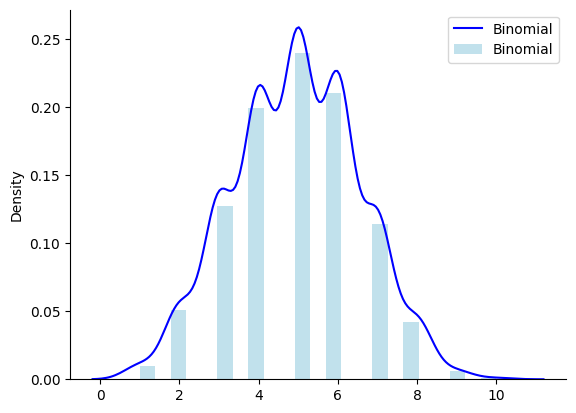

In [40]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

my_binomial = np.random.binomial(n=10, p=0.5, size=1000)

logger.warning(
    'Matplotlib.pylot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

figure, ax = plt.subplots() # type: ignore
sns.kdeplot( # type: ignore
    my_binomial,
    ax=ax,
    color = 'blue',
    label = 'Binomial'
    )
sns.histplot( # type: ignore
    my_binomial,
    ax=ax,
    stat='probability',
    color='lightblue',
    edgecolor='None',
    label = 'Binomial'
    )
sns.despine() # type: ignore
plt.legend() # type: ignore

logger.warning(
    'The kernel density plot is misleading; it shows dips between the\n'
    'discrete values, but the probability of values between those values is\n'
    '0. Thus, although there are really dips in those areas, the dips should\n'
    'go to 0.'
)

Observe how using more samples makes the plot look more like the underlying distribution.


2023-08-04 13:18:28 
	Logger: numpy-tutorial Module: 2597431269 Function: <module> File: 2597431269.py Line: 6
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-04 13:18:28 
	Logger: numpy-tutorial Module: 2597431269 Function: <module> File: 2597431269.py Line: 11
Matplotlib subplots does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.


2023-08-04 13:18:53 
	Logger: numpy-tutorial Module: 2597431269 Function: <module> File: 2597431269.py Line: 42
The kernel density plot is misleading; it shows dips between the
discrete values, but the probability of values between those values is
0. Thus, although there are really dips in those areas, the dips should
go to 0.



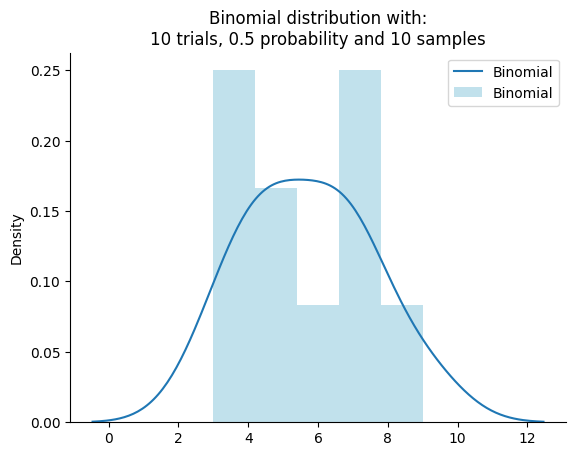

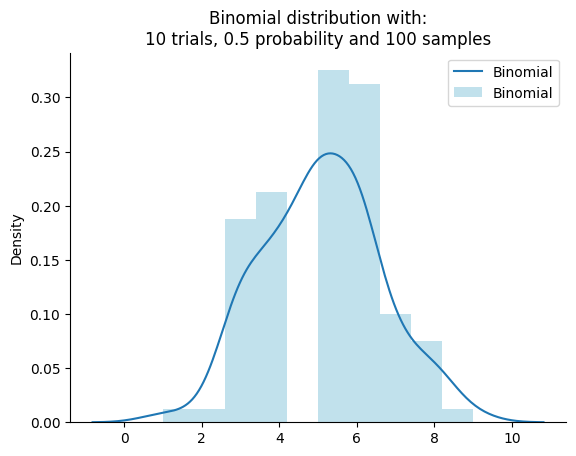

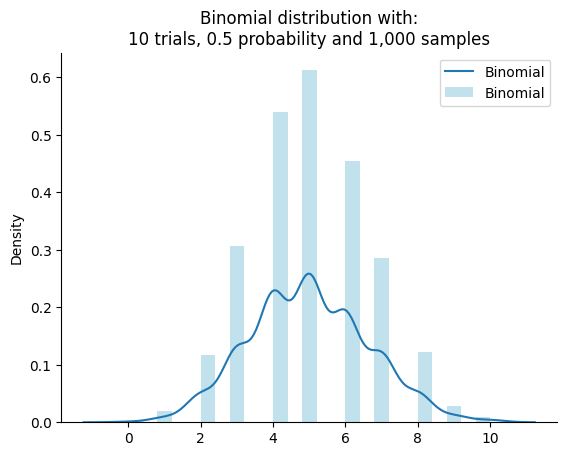

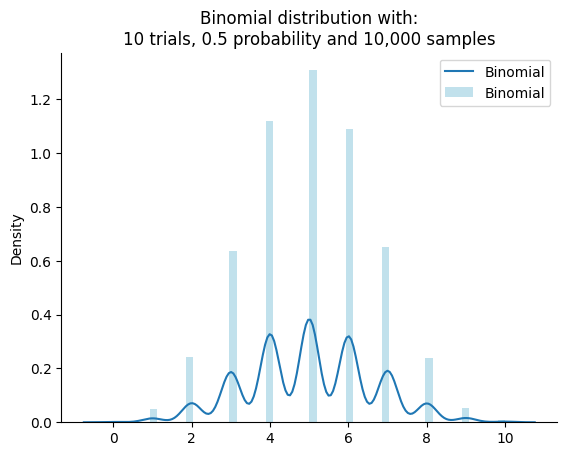

In [36]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib subplots does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_normal(n: int = 10, p: float = 0.5, size: int = 10) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size) # type: ignore

    ax = plt.subplots()[1] # type: ignore
    sns.kdeplot( # type: ignore
        my_binomial,
        ax=ax,
        label='Binomial'
        )
    sns.histplot( # type: ignore
        my_binomial, # type: ignore
        ax=ax,
        color='lightblue',
        edgecolor='None',
        stat='density',
        label='Binomial'
        ).set(
        title='Binomial distribution with:\n'
        f'{n:,} trials, {p} probability and {size:,} samples'
        )
    sns.despine() # type: ignore
    plt.legend() # type: ignore
    
for size in [10, 100, 1_000, 10_000]:
    plot_normal(size=size)

logger.warning(
    'The kernel density plot is misleading; it shows dips between the\n'
    'discrete values, but the probability of values between those values is\n'
    '0. Thus, although there are really dips in those areas, the dips should\n'
    'go to 0.'
)

Observe how increasing the number of trials makes the distribution look more and more like a normal distribution if the probability of success or failure is 0.5.

*However,* do not be mislead! The binomial distribution is discrete, not continuous. Thus, the distribution looks more and more normal do the the scaling of the figure and the inaccuracy of the kernel density plot; there is 0 probability of getting non-integer values, so the kernel density estimate should drop to 0 between every integer, and the plot looks normal only because there are more and more bars visualized closer and closer together... But there are never peaks at non-integer values.


2023-08-04 12:34:21 
	Logger: numpy-tutorial Module: 4050607201 Function: <module> File: 4050607201.py Line: 6
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-04 12:34:21 
	Logger: numpy-tutorial Module: 4050607201 Function: <module> File: 4050607201.py Line: 11
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.




2023-08-04 12:34:22 
	Logger: numpy-tutorial Module: 4050607201 Function: <module> File: 4050607201.py Line: 58
The kernel density plot is misleading; it shows dips between the
discrete values, but the probability of values between those values is
0. Thus, although there are really dips in those areas, the dips should
go to 0.



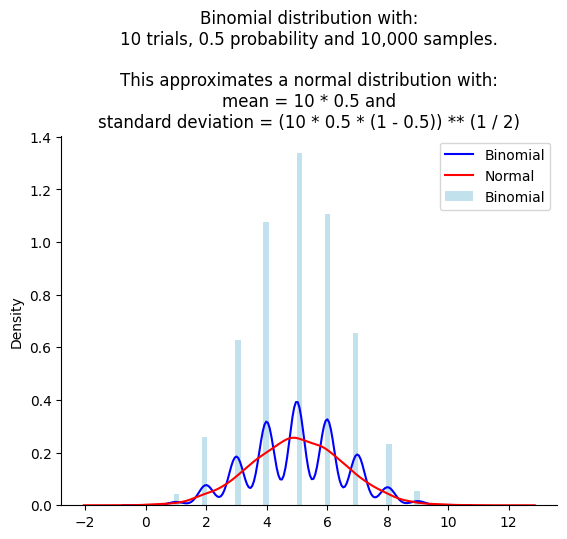

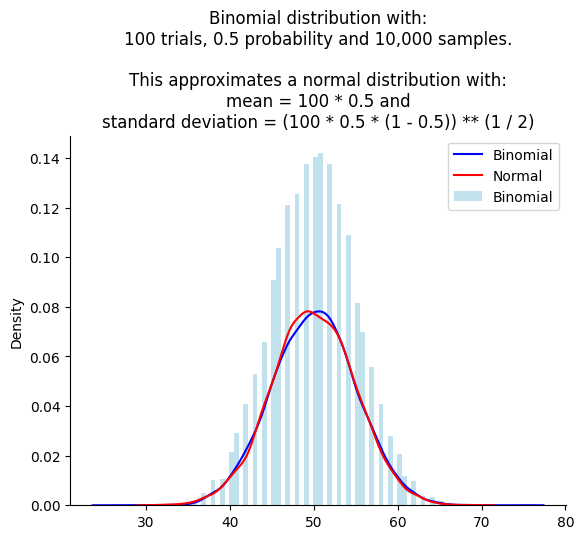

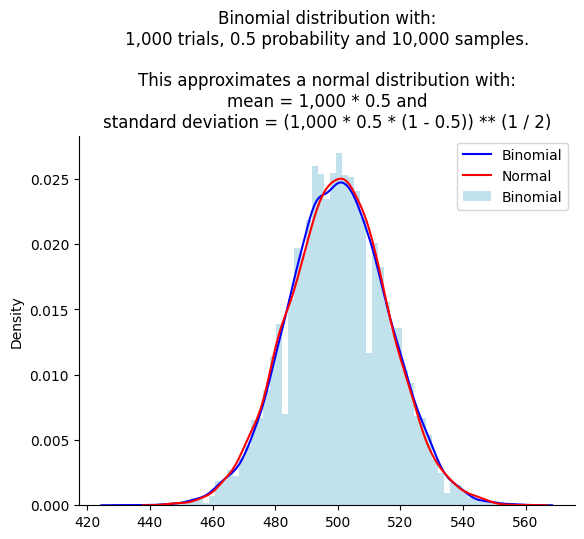

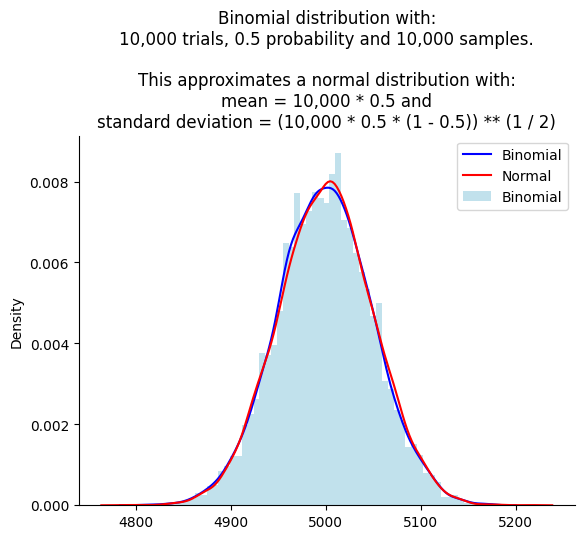

In [32]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_normal(n: int = 10, p: float = 0.5, size: int = 10) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size) # type: ignore

    my_normal = np.random.normal(
        loc=n*p,
        scale=(n * p * (1-p)) ** (1 / 2),
        size=size
        )

    ax = plt.subplots()[1] # type: ignore
    sns.kdeplot( # type: ignore
        my_binomial, 
        ax=ax, 
        color='blue', 
        label='Binomial'
        )
    sns.kdeplot( # type: ignore
        my_normal, 
        ax=ax, 
        color='red', 
        label='Normal'
        )
    sns.histplot( # type: ignore
        my_binomial, # type: ignore
        ax=ax,
        color='lightblue',
        edgecolor='None',
        stat='density',
        label='Binomial'
        ).set(
        title='Binomial distribution with:\n'
        f'{n:,} trials, {p} probability and {size:,} samples.\n\n'
        'This approximates a normal distribution with:\n'
        f'mean = {n:,} * {p} and\n'
        f'standard deviation = ({n:,} * {p} * (1 - {p})) ** (1 / 2)'
        )
    sns.despine() # type: ignore
    plt.legend() # type: ignore
    
for n in [10, 100, 1_000, 10_000]:
    plot_normal(n=n, size=10_000)

logger.warning(
    'The kernel density plot is misleading; it shows dips between the\n'
    'discrete values, but the probability of values between those values is\n'
    '0. Thus, although there are really dips in those areas, the dips should\n'
    'go to 0.'
)

Observe how modifying the probability skews the distribution.

This is most obvious with lower trial numbers, since once there are many trials, the distributions all look approximately normal, although they still clearly 'shift right' as the probability of a successful trial grows (examine the difference in x-axis scales as the probability increases from 0.1 to 0.9).


2023-08-04 12:34:55 
	Logger: numpy-tutorial Module: 2354440033 Function: <module> File: 2354440033.py Line: 6
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-04 12:34:55 
	Logger: numpy-tutorial Module: 2354440033 Function: <module> File: 2354440033.py Line: 11
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



/tmp/ipykernel_587/2354440033.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.subplots()[1] # type: ignore


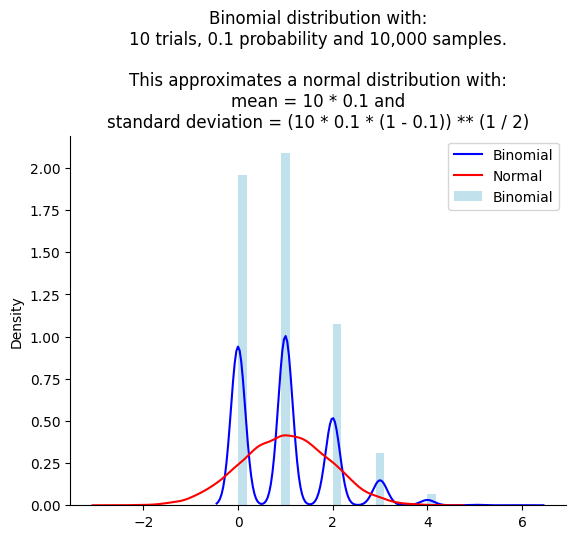

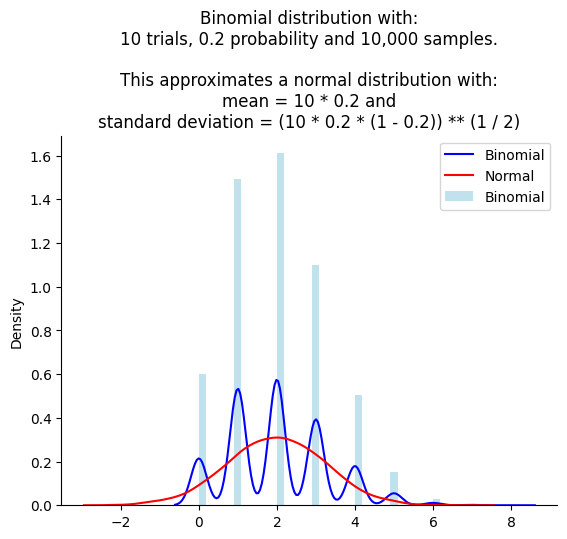

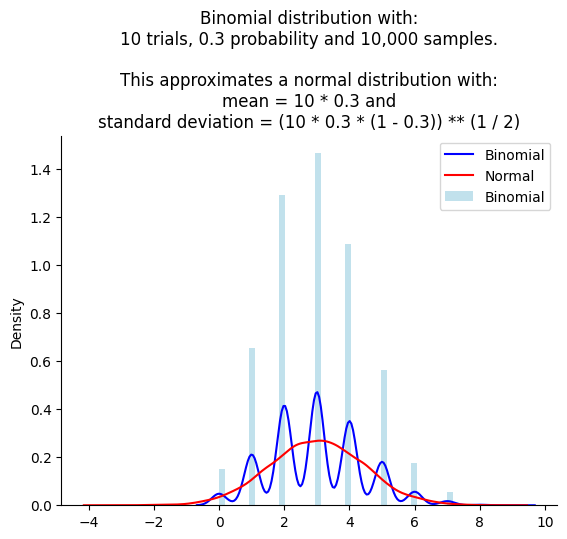

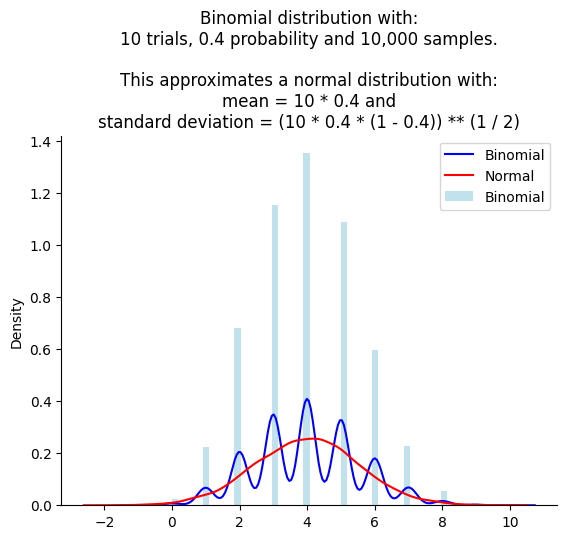

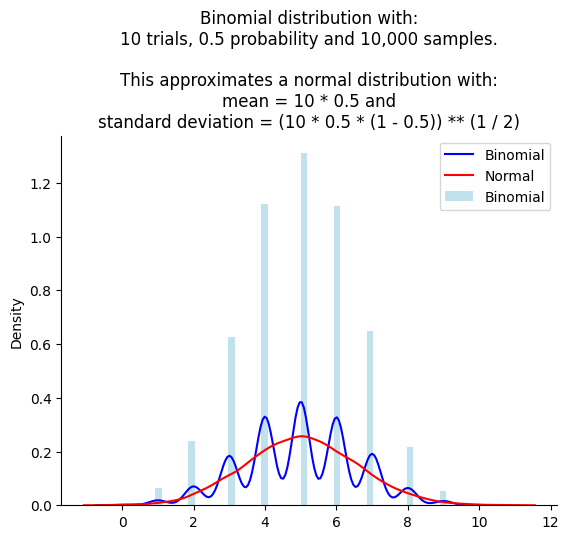

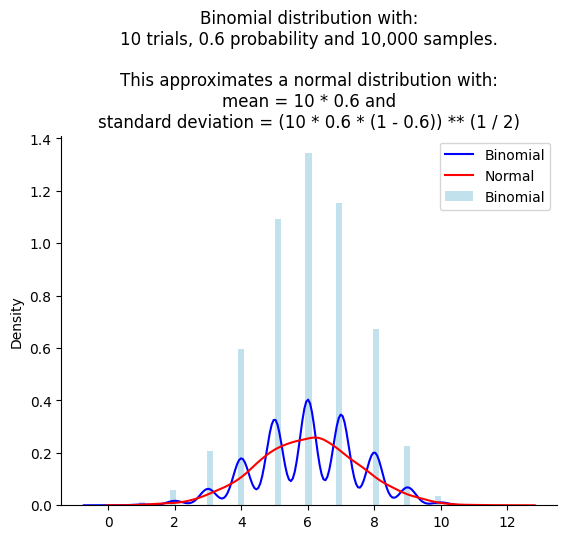

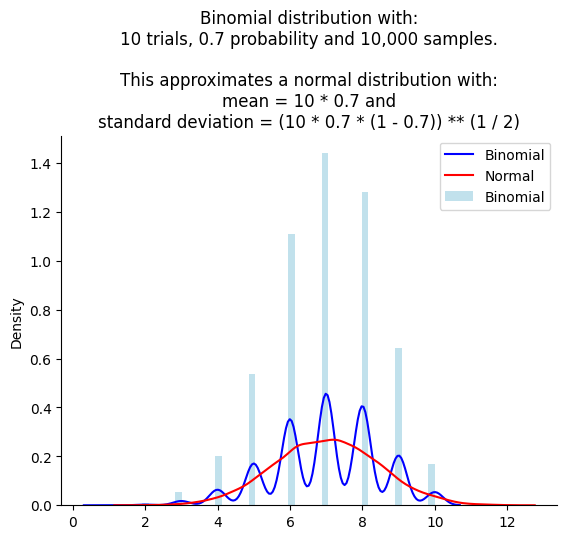

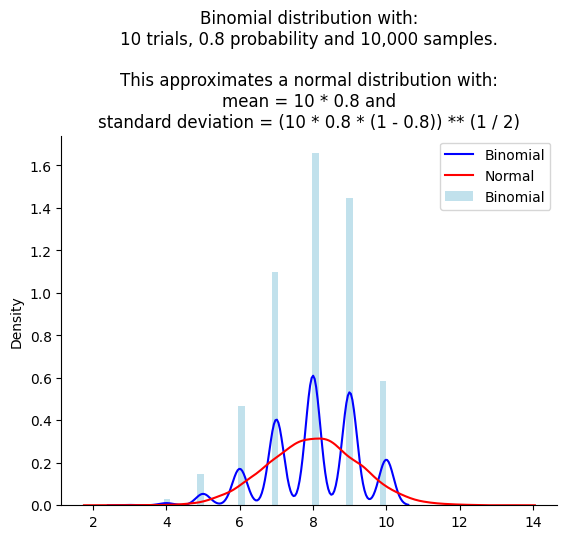

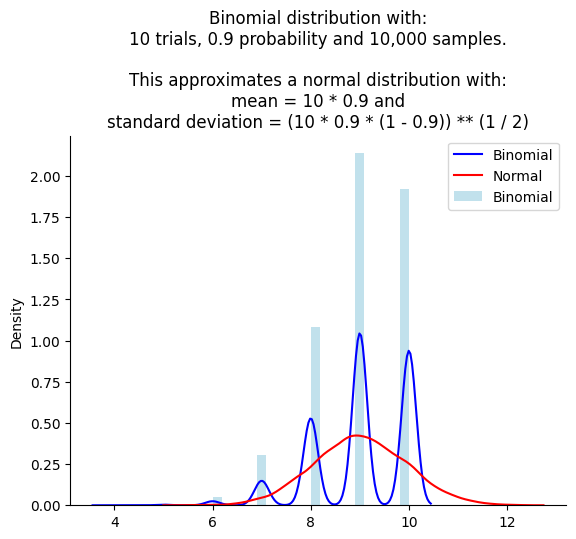

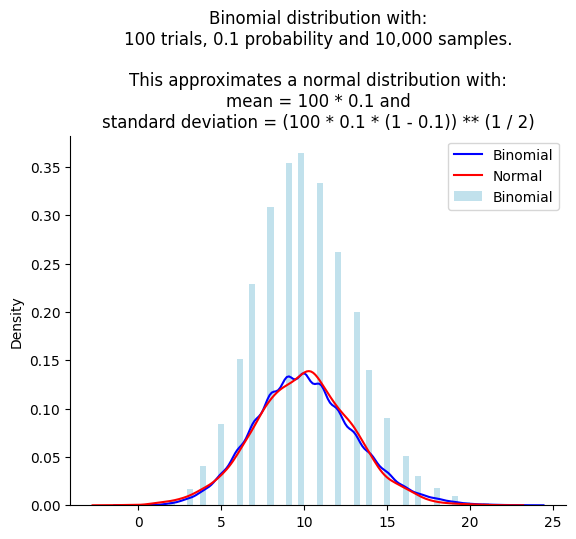

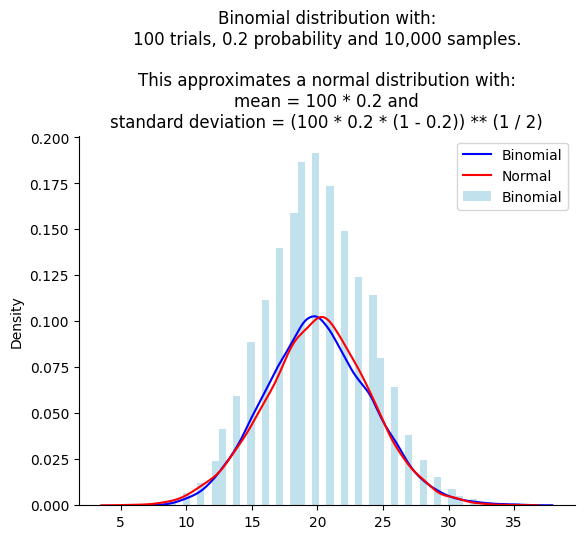

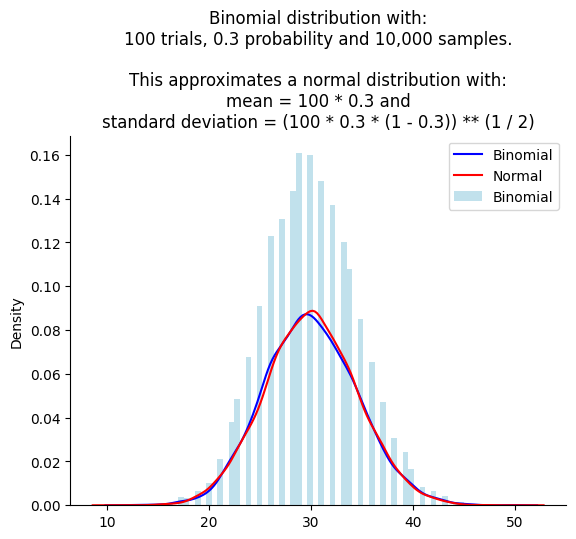

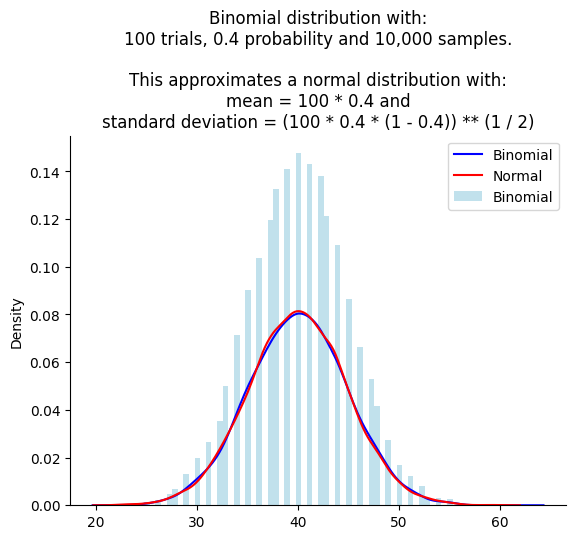

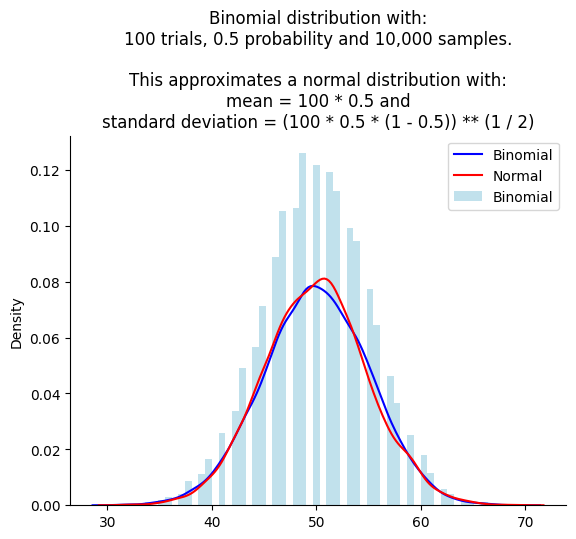

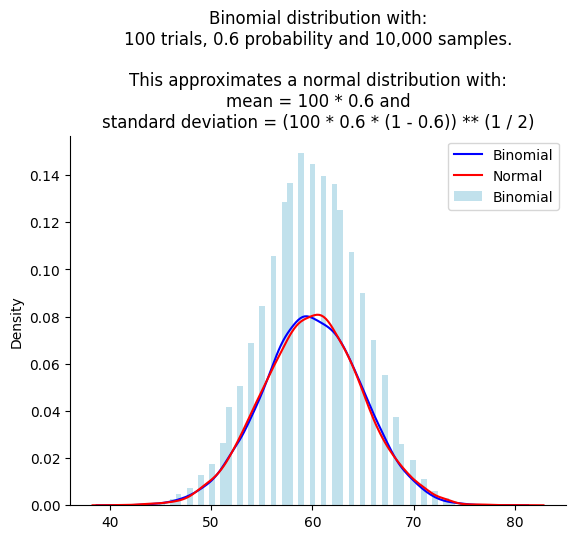

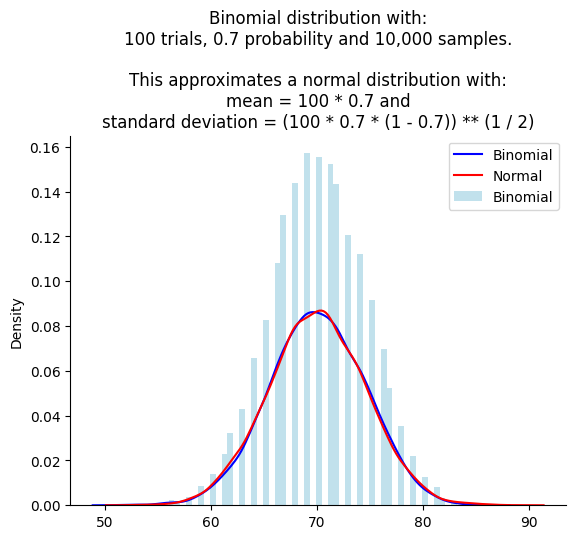

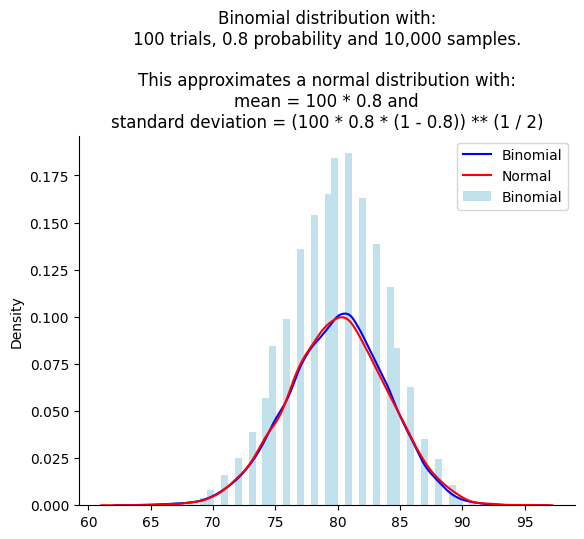

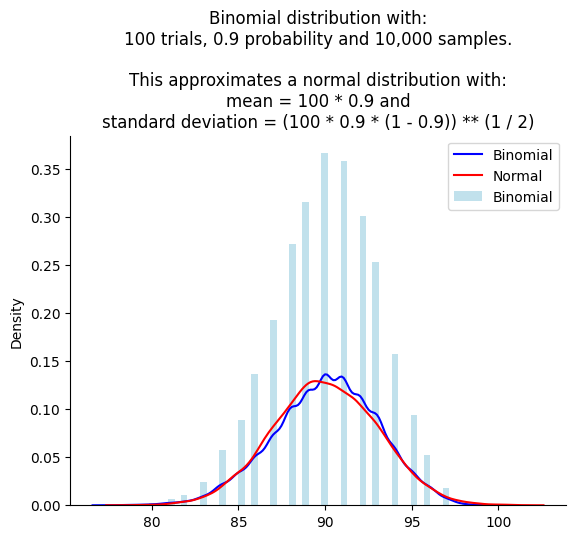

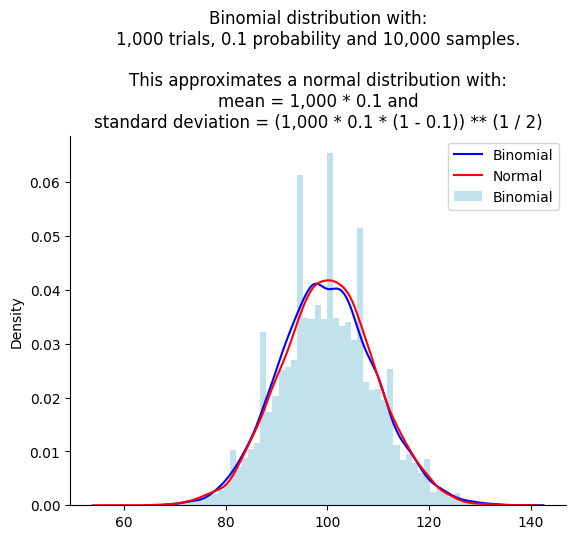

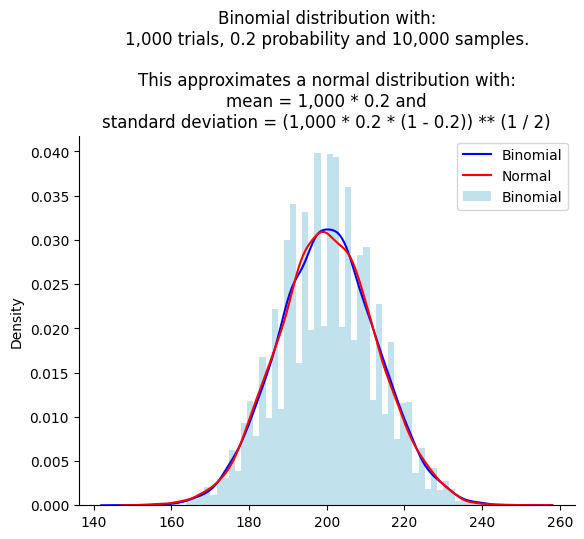

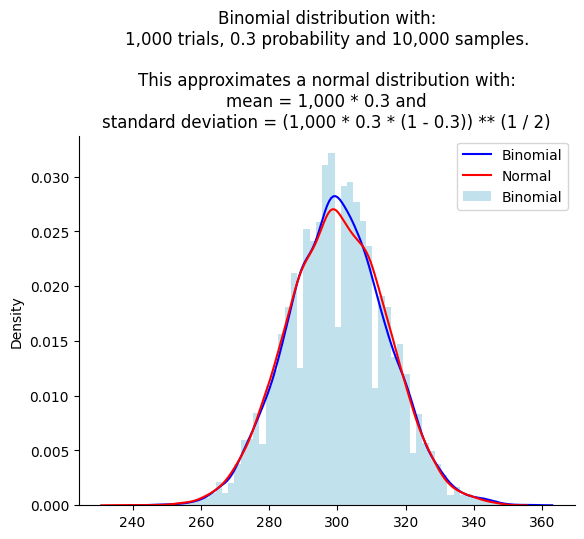

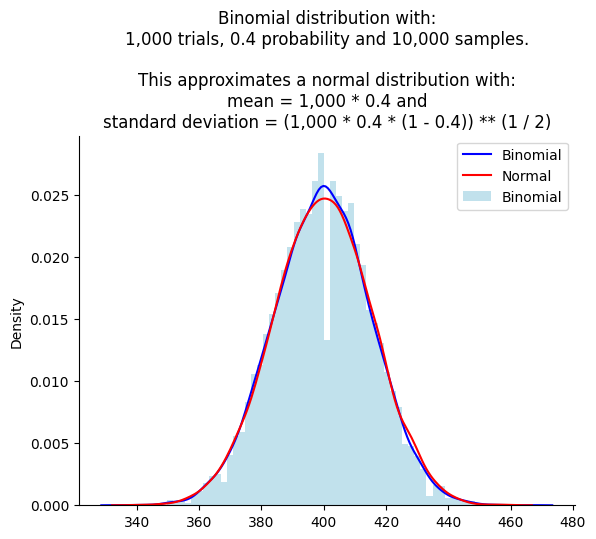

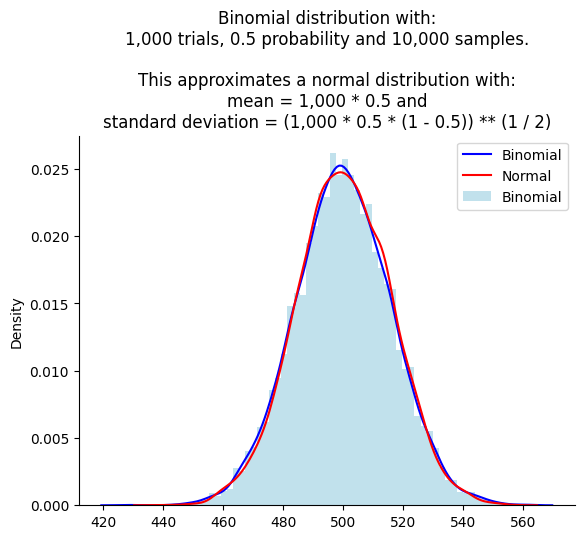

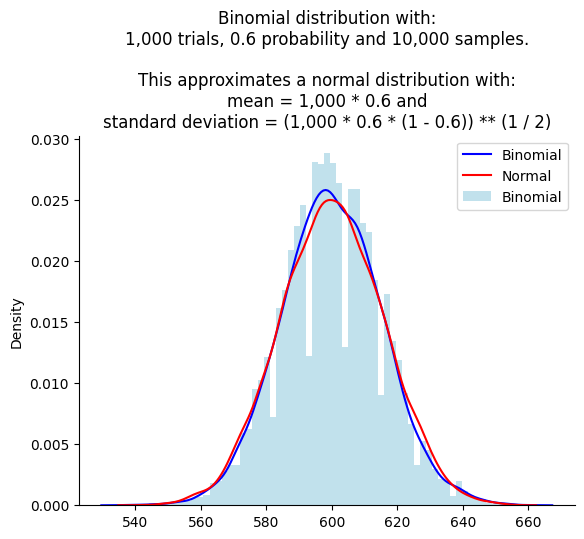

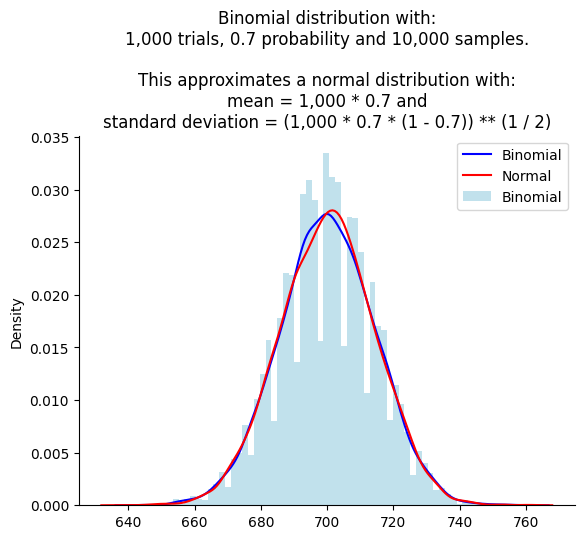

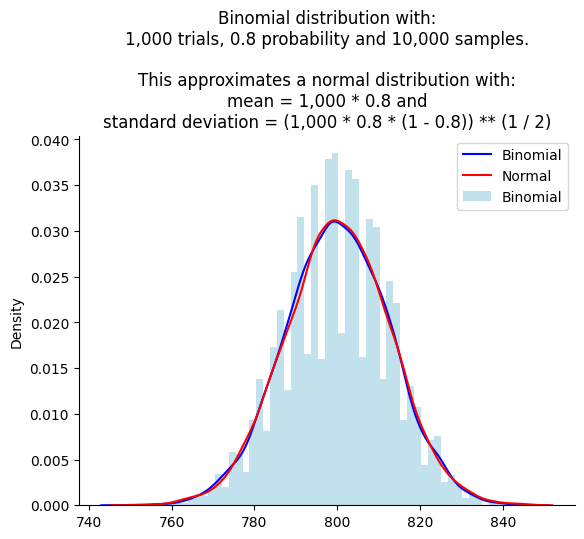

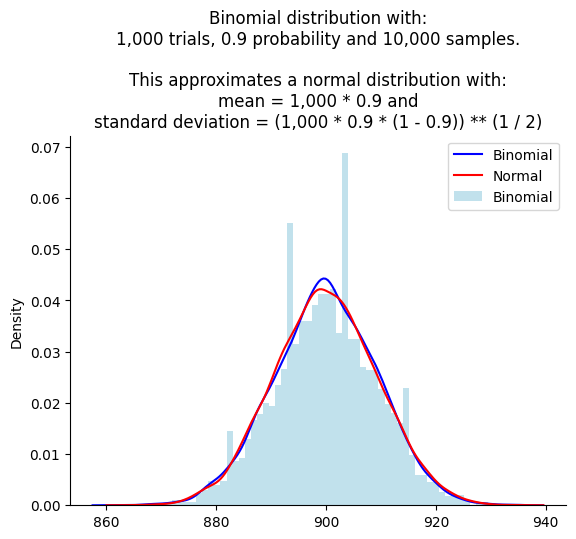

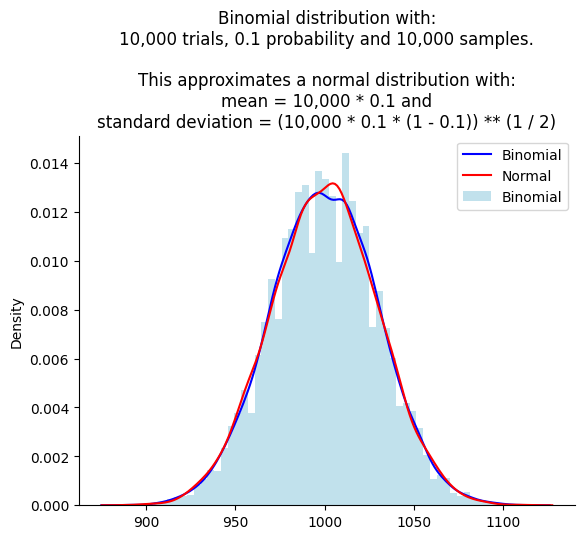

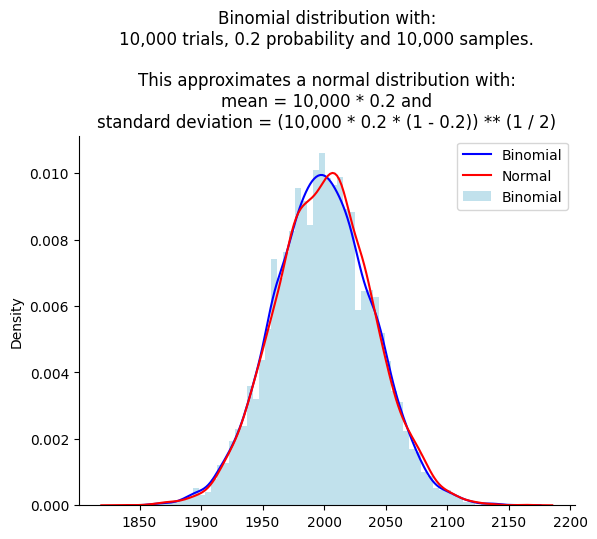

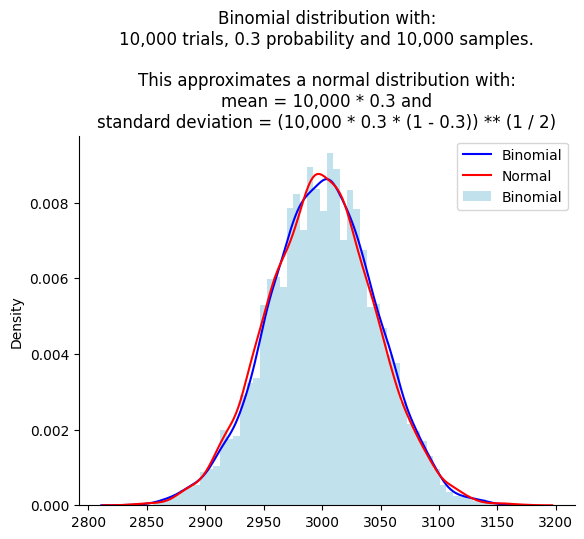

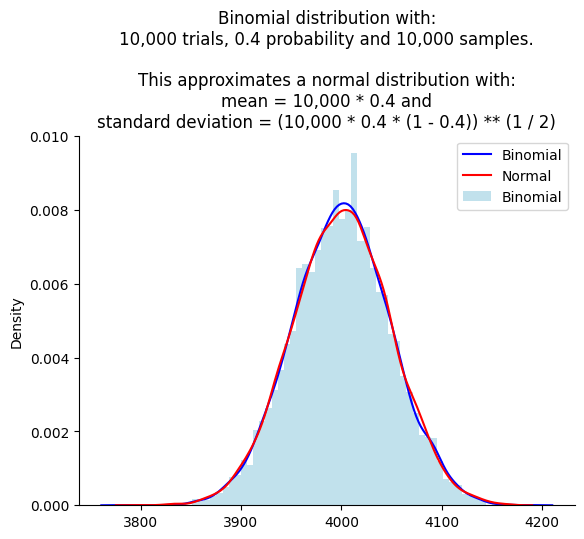

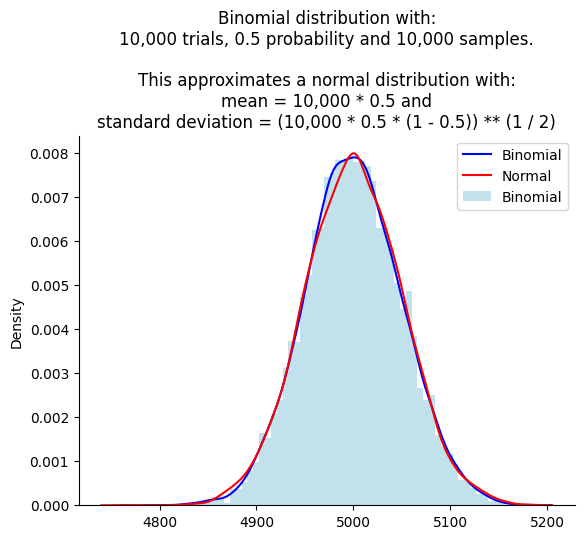

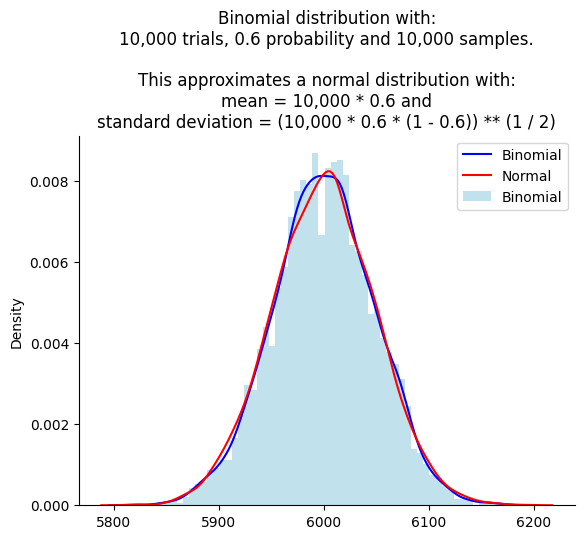

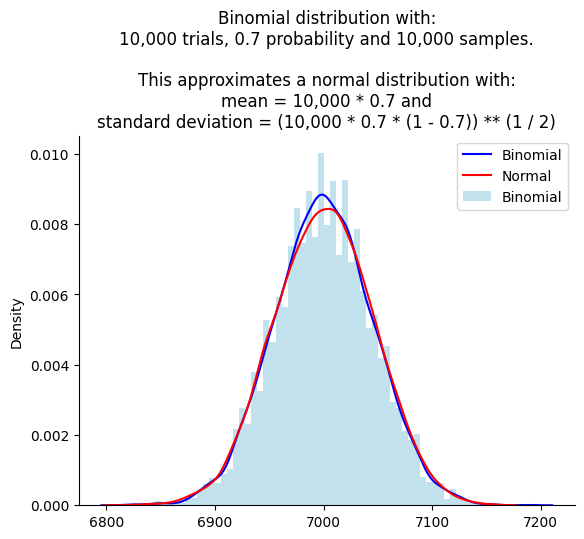

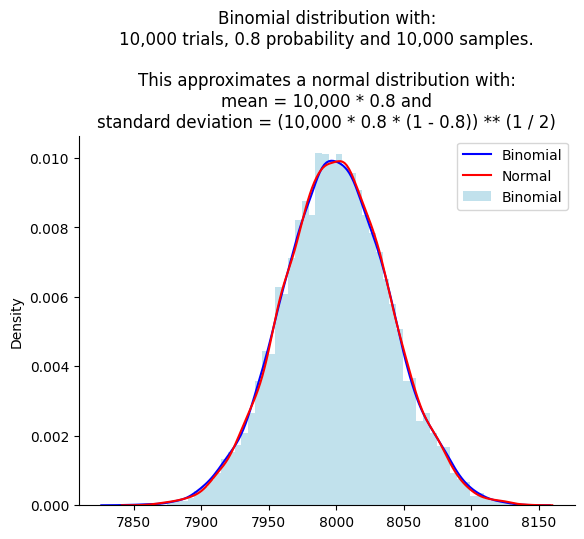

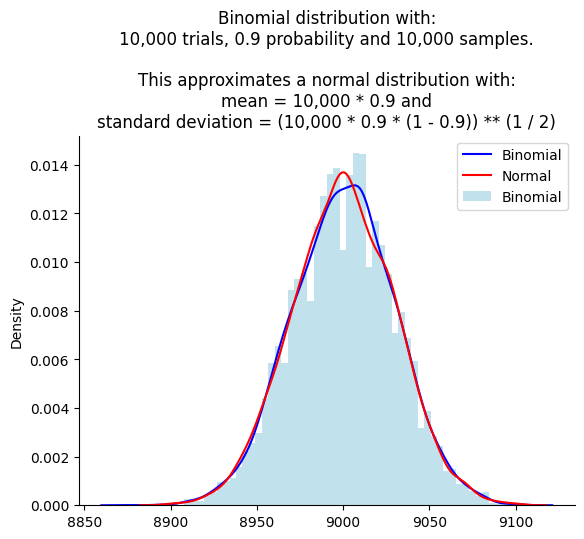

In [33]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_normal(n: int = 10, p: float = 0.5, size: int = 10) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size) # type: ignore

    my_normal = np.random.normal(
        loc=n*p,
        scale=(n * p * (1-p)) ** (1 / 2),
        size=size
        )

    ax = plt.subplots()[1] # type: ignore
    sns.kdeplot( # type: ignore
        my_binomial,
        ax=ax,
        color='blue',
        label='Binomial'
        )
    sns.kdeplot( # type: ignore
        my_normal,
        ax=ax,
        color='red',
        label='Normal'
        )
    sns.histplot( # type: ignore
        my_binomial, # type: ignore
        ax=ax,
        color='lightblue',
        edgecolor='None',
        stat='density',
        label='Binomial'
        ).set(
        title='Binomial distribution with:\n'
        f'{n:,} trials, {p} probability and {size:,} samples.\n\n'
        'This approximates a normal distribution with:\n'
        f'mean = {n:,} * {p} and\n'
        f'standard deviation = ({n:,} * {p} * (1 - {p})) ** (1 / 2)'
        )
    sns.despine() # type: ignore
    plt.legend() # type: ignore

for n in [10, 100, 1_000, 10_000]:
    for _float in np.array([*range(1, 10)])/10:
        plot_normal(n=n, p=_float, size=10_000)